# Seminar 4

On this seminar, we will on Wi-Fi performance, specifically, how to address this topic using NNs


### Part 1 Data Visualization

In [7]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


,LocationNumber,RSSI,TxLinkSpeed,RxLinkSpeed,MainAPConnect,TxThroughput,AvgPingLatency
count,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000
mean,18.151161,-62.364212,491.264874,460.954107,0.913958,12.988920,54.771372
std,10.338002,9.442463,240.868700,251.600115,0.280430,4.413973,8.735672
min,1.000000,-79.040000,33.240000,-12.530000,0.000000,0.780000,39.300000
25%,9.000000,-70.360000,273.200000,249.127500,1.000000,11.320000,48.940000
50%,18.000000,-62.910000,476.635000,396.480000,1.000000,14.790000,52.290000
75%,27.000000,-53.790000,664.390000,656.422500,1.000000,15.980000,57.470000
max,36.000000,-37.020000,905.390000,911.000000,1.000000,19.160000,96.550000


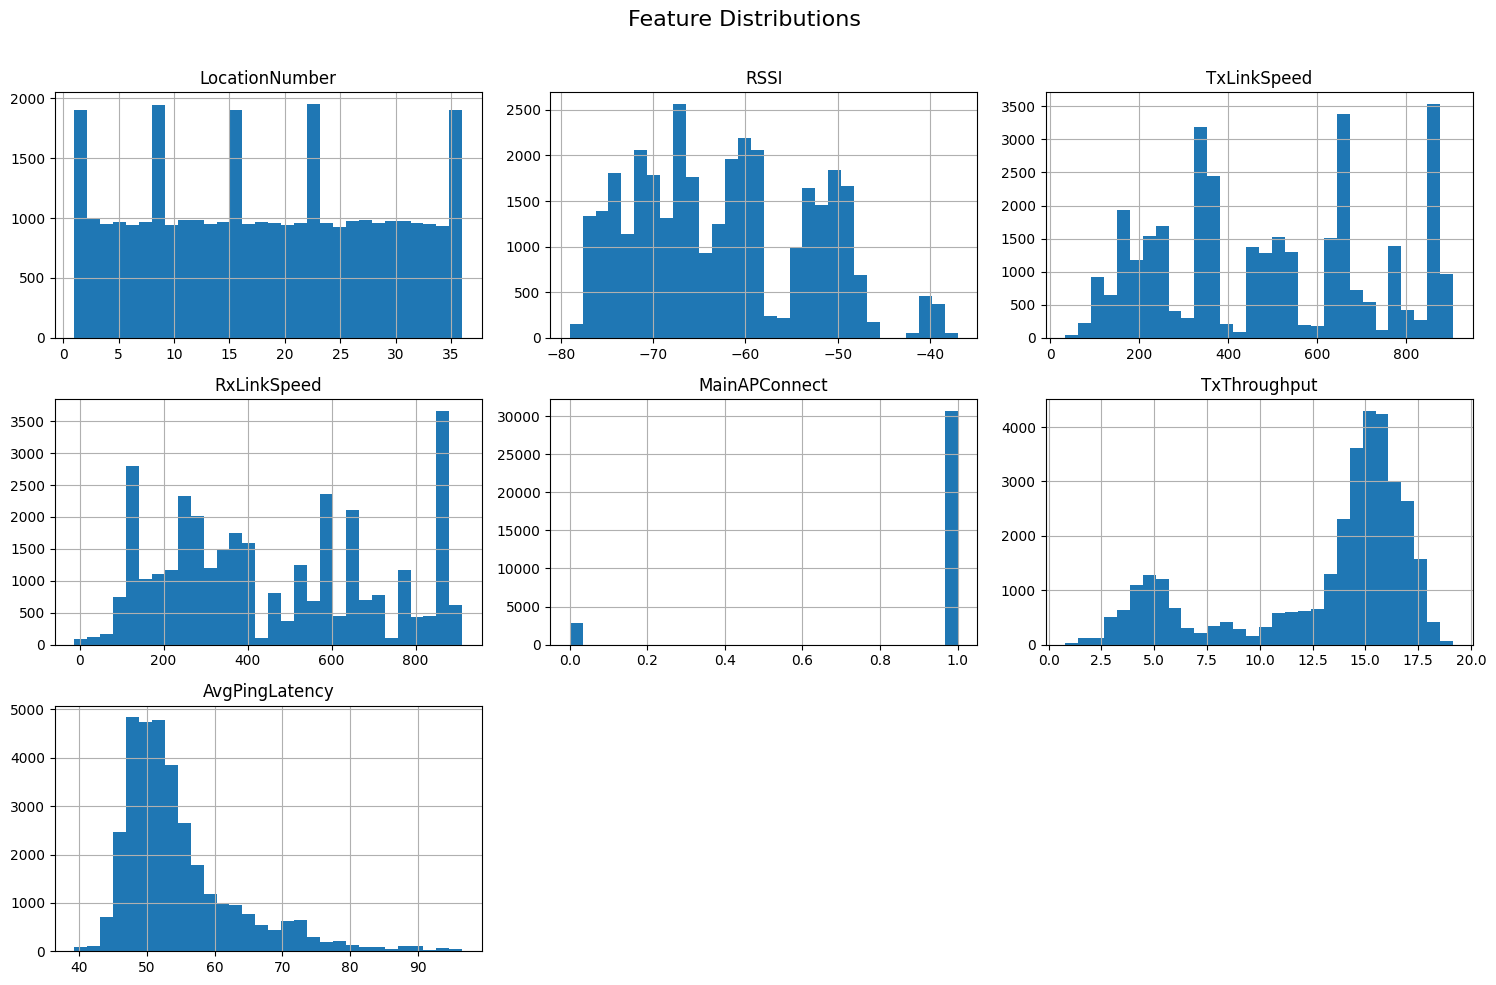

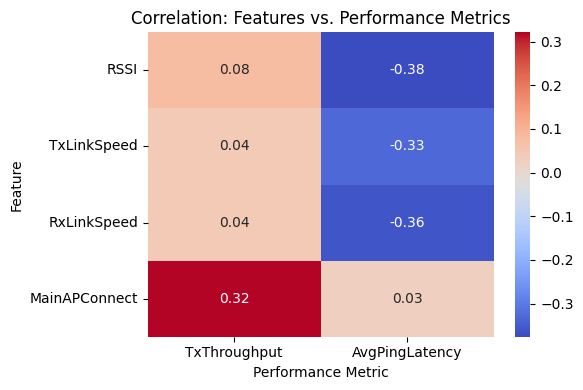

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df_test = pd.read_csv("test_data.csv")
df_train = pd.read_csv("train_data.csv")

# Show descriptive statistics
display(df_train.describe())

# Plot histograms for each feature
df_train.hist(bins=30, figsize=(15, 10), grid=True)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# Select main features and performance metrics
features = ["RSSI", "TxLinkSpeed", "RxLinkSpeed", "MainAPConnect"]
performance = ["TxThroughput", "AvgPingLatency"]

# Compute correlation matrix between features and performance metrics
corr = df_train[features + performance].corr()

# Extract only correlations of features with performance metrics
corr_focus = corr.loc[features, performance]

# Plot the focused correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_focus, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation: Features vs. Performance Metrics")
plt.xlabel("Performance Metric")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [9]:
display(df_train.shape)

display(df_test.shape)

(33600, 7)

(8400, 7)

In [10]:
display(df_train.head())

,LocationNumber,RSSI,TxLinkSpeed,RxLinkSpeed,MainAPConnect,TxThroughput,AvgPingLatency
0,2,-72.32,163.11,118.36,1,13.51,51.79
1,32,-73.18,238.45,212.83,1,3.35,68.80
2,20,-40.67,865.44,863.39,1,17.62,50.79
3,10,-60.66,473.89,396.92,1,14.30,64.15
4,29,-67.96,479.74,355.99,1,4.81,73.81


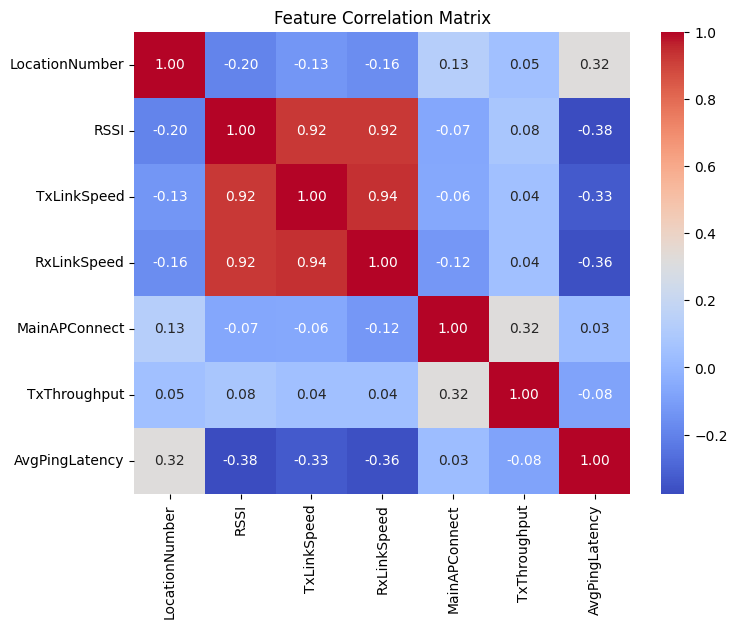

In [11]:
# Optional: Plot the correlation matrix for all features
# This can be useful for understanding relationships between all features

plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

### Part 2 FNNs

Looking at the correlation Matrix, we can see that RSSI, TxLinkSpeed and RxLinkSpeed, have a strong negative correlation with the Average Ping Latency, while they have small correlation with TxThorughput.

We can also see that MainAPConnect has a strong positive correlation with TxThroughput , and a small correlation with Average Ping Latency, completely contrary as the other two.

Since we have only 4 input features for predicting 2 outuput features, and the 4 of them present somewhat of a correlation with the 2 expected features (in some way or anothre), it makes sense to keep the 4 and work with everything.

The design of the FNN, will have 4 inputs, the hidden layers that we will discuss later on and finally the 2 output features that measure the quality of the Wi-Fi.

In [12]:
# Feature selection for modeling

features = ["RSSI", "TxLinkSpeed", "RxLinkSpeed", "MainAPConnect"]
targets = ["TxThroughput", "AvgPingLatency"]

X_train = df_train[features]
y_train = df_train[targets]

X_test = df_test[features]
y_test = df_test[targets]

In [13]:
from sklearn.preprocessing import StandardScaler

# Normalize the features (recommended for neural networks)
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)

# If you need to encode categorical variables, use OneHotEncoder or similar.
# In your case, 'MainAPConnect' is already 0/1, so no encoding is needed.

# Optionally, you can also scale the targets if you want (especially for regression)
from sklearn.preprocessing import MinMaxScaler
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)

# X_scaled is now ready for training your FNN

Now we have prepared the data for developing, what we shall do is to prepare a model for learning the non-linear relationships there is on it.

In [14]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


#### Model Training Explanation

We train the Feedforward Neural Network (FNN) using the scaled training data. The model is trained for 50 epochs with a batch size of 32, and 20% of the training data is used for validation. The Adam optimizer is chosen for its efficiency and adaptive learning rate, and Mean Squared Error (MSE) is used as the loss function since we are solving a regression problem. The Mean Absolute Error (MAE) is also tracked as an additional performance metric. During training, the model learns to predict both throughput and latency simultaneously by minimizing the loss on both outputs.

Epoch 1/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1450 - mae: 0.2612 - val_loss: 0.0354 - val_mae: 0.1400
Epoch 2/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0346 - mae: 0.1387 - val_loss: 0.0346 - val_mae: 0.1401
Epoch 3/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0340 - mae: 0.1373 - val_loss: 0.0346 - val_mae: 0.1399
Epoch 4/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0335 - mae: 0.1367 - val_loss: 0.0337 - val_mae: 0.1339
Epoch 5/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0330 - mae: 0.1345 - val_loss: 0.0339 - val_mae: 0.1392
Epoch 6/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0327 - mae: 0.1338 - val_loss: 0.0330 - val_mae: 0.1326
Epoch 7/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0327 - mae: 0.1336 - val_loss: 0.0328 - val_mae: 0.1362
Epoch 8/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0321 - mae: 0.1323 - val_loss: 0.0326 - val_mae: 0.1318
Epoch 9/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

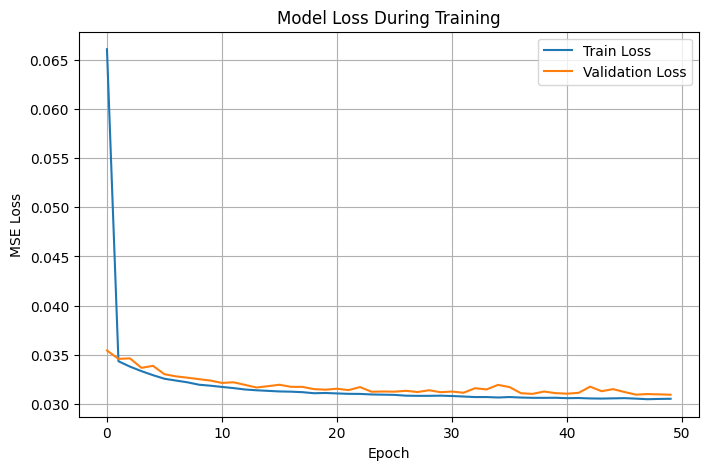

Final Training Loss: 0.0305
Final Validation Loss: 0.0309
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0304 - mae: 0.1299  
Test loss: 0.030675793066620827
Test MAE: 0.1310189962387085


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Normalize the test set using the same scaler as the train set
X_test_scaled = x_scaler.transform(X_test)
y_test_scaled =y_scaler.transform(y_test)

# Build a simple FNN model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),   # 4 input features
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(y_train_scaled.shape[1])             # 2 outputs
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Model Loss During Training')
plt.legend()
plt.grid(True)
plt.show()

# Print final losses
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled)
print("Test loss:", test_loss)
print("Test MAE:", test_mae)

In [17]:
# Predict on test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE (original scale):", mean_absolute_error(y_true, y_pred))
print("MSE (original scale):", mean_squared_error(y_true, y_pred))

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
MAE (original scale): 4.17482823765334
MSE (original scale): 33.3080541261168


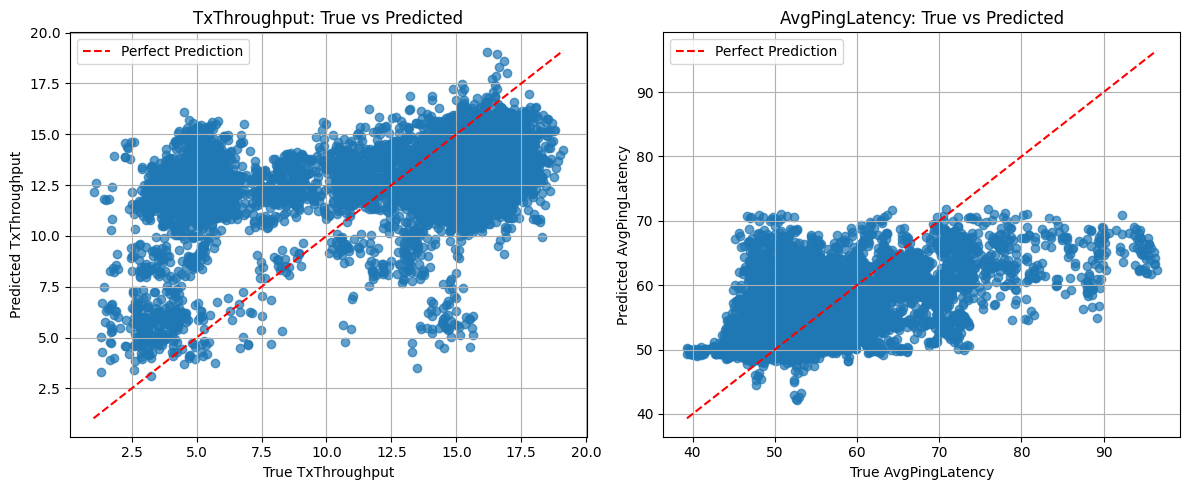

In [20]:
plt.figure(figsize=(12,5))

# TxThroughput
plt.subplot(1,2,1)
plt.scatter(y_true[:,0], y_pred[:,0], alpha=0.7)
min_val = min(y_true[:,0].min(), y_pred[:,0].min())
max_val = max(y_true[:,0].max(), y_pred[:,0].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
plt.xlabel("True TxThroughput")
plt.ylabel("Predicted TxThroughput")
plt.title("TxThroughput: True vs Predicted")
plt.legend()
plt.grid(True)

# AvgPingLatency
plt.subplot(1,2,2)
plt.scatter(y_true[:,1], y_pred[:,1], alpha=0.7)
min_val = min(y_true[:,1].min(), y_pred[:,1].min())
max_val = max(y_true[:,1].max(), y_pred[:,1].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
plt.xlabel("True AvgPingLatency")
plt.ylabel("Predicted AvgPingLatency")
plt.title("AvgPingLatency: True vs Predicted")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import r2_score
print("R2 TxThroughput:", r2_score(y_true[:,0], y_pred[:,0]))
print("R2 AvgPingLatency:", r2_score(y_true[:,1], y_pred[:,1]))

R2 TxThroughput: 0.214903207285302
R2 AvgPingLatency: 0.3310469866784509
